# Credit Card Data- Dealing with Class Imbalance 

## By- Rhea Sethi

# 0.) Import the Credit Card Fraud Data

In [ ]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/fraudTest.csv")

In [ ]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [ ]:
#Select 4 columns as features

df_select = df[['trans_date_trans_time', 'city_pop','amt','gender']] 

df_select

,trans_date_trans_time,city_pop,amt,gender
0,2020-06-21 12:14:25,333497,2.86,M
1,2020-06-21 12:14:33,302,29.84,F
2,2020-06-21 12:14:53,34496,41.28,F
3,2020-06-21 12:15:15,54767,60.05,M
4,2020-06-21 12:15:17,1126,3.19,M
...,...,...,...,...
555714,2020-12-31 23:59:07,519,43.77,M
555715,2020-12-31 23:59:09,28739,111.84,M
555716,2020-12-31 23:59:15,3684,86.88,F
555717,2020-12-31 23:59:24,129,7.99,M


In [ ]:
#Creating new variable out of trans_date_trans_time

df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
type(df_select["trans_date_trans_time"][0])

<ipython-input-7-e522d7a7c5cd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])


pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
#Extracting a number for the day of the week from the date
df_select['Weekday'] = df_select['trans_date_trans_time'].dt.day_of_week
df_select['Weekday'].unique()

<ipython-input-8-eff7f6dc7a43>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select['Weekday'] = df_select['trans_date_trans_time'].dt.day_of_week


array([6, 0, 1, 2, 3, 4, 5])

In [ ]:
#Creating a binary column for weekend from day of week
#We define weekend as Friday, Saturday, Sunday

weekend = [4,5,6]
weekend_binary = []

for i in df_select["Weekday"]:
  if i in weekend:
    weekend_binary.append(1)
  else:
    weekend_binary.append(0)
df_select['Weekend_binary']= weekend_binary

df_select

<ipython-input-9-33f95b14541c>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select['Weekend_binary']= weekend_binary


,trans_date_trans_time,city_pop,amt,gender,Weekday,Weekend_binary
0,2020-06-21 12:14:25,333497,2.86,M,6,1
1,2020-06-21 12:14:33,302,29.84,F,6,1
2,2020-06-21 12:14:53,34496,41.28,F,6,1
3,2020-06-21 12:15:15,54767,60.05,M,6,1
4,2020-06-21 12:15:17,1126,3.19,M,6,1
...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,519,43.77,M,3,0
555715,2020-12-31 23:59:09,28739,111.84,M,3,0
555716,2020-12-31 23:59:15,3684,86.88,F,3,0
555717,2020-12-31 23:59:24,129,7.99,M,3,0


In [ ]:
#creating dummy variable for gender column
dummies = pd.get_dummies(df_select["gender"])

In [ ]:
#Final Set of predictors
X = pd.concat([df_select[["city_pop","amt","Weekend_binary"]],dummies], axis =1)
X

,city_pop,amt,Weekend_binary,F,M
0,333497,2.86,1,0,1
1,302,29.84,1,1,0
2,34496,41.28,1,1,0
3,54767,60.05,1,0,1
4,1126,3.19,1,0,1
...,...,...,...,...,...
555714,519,43.77,0,0,1
555715,28739,111.84,0,0,1
555716,3684,86.88,0,1,0
555717,129,7.99,0,0,1


In [ ]:
#Normalizing the data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)
X_normalized

array([[ 0.81652054, -0.42446311,  1.24383949, -1.10249443,  1.10249443],
       [-0.2926852 , -0.25233729,  1.24383949,  0.90703406, -0.90703406],
       [-0.17885341, -0.17935288,  1.24383949,  0.90703406, -0.90703406],
       ...,
       [-0.28142652,  0.11156401, -0.80396225,  0.90703406, -0.90703406],
       [-0.29326111, -0.39173496, -0.80396225, -1.10249443,  1.10249443],
       [ 0.09247663, -0.19944911, -0.80396225, -1.10249443,  1.10249443]])

In [ ]:
#Defining dependent variable 
y = np.array(df['is_fraud'])
y

array([0, 0, 0, ..., 0, 0, 0])

# 1.) Use scikit learn preprocessing to split the data into 70/30 in out of sample

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.30, random_state=42)

# 2.) Make three sets of training data (Oversample, Undersample and SMOTE)

In [ ]:
#Oversampling training data
from imblearn.over_sampling import RandomOverSampler

In [ ]:
ros = RandomOverSampler(random_state = 0)
ros.fit(X_train,y_train)
over_X, over_y = ros.fit_resample(X_train, y_train)

In [ ]:
#Undersampling training data
from imblearn.under_sampling import RandomUnderSampler 

In [ ]:
rus = RandomUnderSampler(random_state = 0)
rus.fit(X_train,y_train)
under_X, under_y = rus.fit_resample(X_train, y_train)

In [ ]:
#SMOTE over training data
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
smote_X, smote_y = oversample.fit_resample(X_train, y_train)

# 3.) Train three logistic regression models 

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
#Model with Oversampled data
over_log_reg = LogisticRegression().fit(over_X, over_y)

In [ ]:
#Model with Undersampled data
under_log_reg = LogisticRegression().fit(under_X, under_y)

In [ ]:
#Model with SMOTE data
smote_log_reg = LogisticRegression().fit(smote_X, smote_y)

# 4.) Test the three models

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt

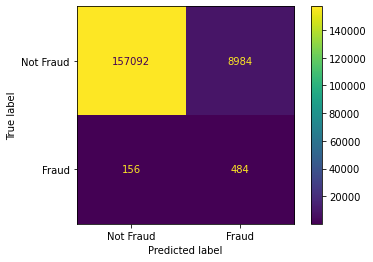

In [ ]:
#Oversampled data
over_y_pred = over_log_reg.predict(X_test)

confusion_matrix = metrics.confusion_matrix(y_test, over_y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Not Fraud', 'Fraud'])
cm_display.plot()
plt.show()

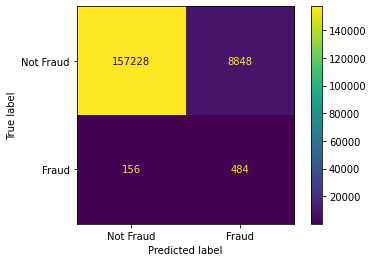

In [ ]:
#Undersampled data
under_y_pred = under_log_reg.predict(X_test)

confusion_matrix = metrics.confusion_matrix(y_test, under_y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Not Fraud', 'Fraud'])
cm_display.plot()
plt.show()

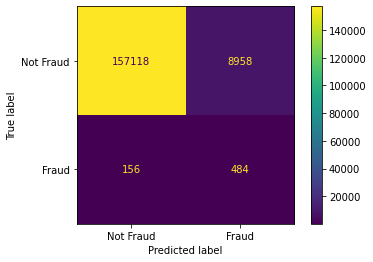

In [ ]:
#SMOTE data
smote_y_pred = smote_log_reg.predict(X_test)

confusion_matrix = metrics.confusion_matrix(y_test, smote_y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Not Fraud', 'Fraud'])
cm_display.plot()
plt.show()

# 5.) Which performed best in Out of Sample metrics?

Since all 3 models have the same predictions for True Label = Fraud (all the 3 have the same number of True Positives and False Positives), we choose the model that minimizes False negatives, i.e., maximizes the True Negative Rate or Specificity. This would also show up in the overall accuracy score. 


In [ ]:
from sklearn.metrics import accuracy_score
from imblearn.metrics import specificity_score

In [ ]:
#Evaluating Model for Oversampled data
print("Accuracy Score:", accuracy_score(y_test, over_y_pred))

print("Specificity Score:", specificity_score(y_test, over_y_pred))

Accuracy Score: 0.9451762278365604
Specificity Score: 0.945904284785279


In [ ]:
print("Accuracy Score:", accuracy_score(y_test, under_y_pred))

print("Specificity Score:", specificity_score(y_test, under_y_pred))

Accuracy Score: 0.9459919863720339
Specificity Score: 0.9467231869746381


In [ ]:
print("Accuracy Score:", accuracy_score(y_test, smote_y_pred))

print("Specificity Score:", specificity_score(y_test, smote_y_pred))

Accuracy Score: 0.9453321816742244
Specificity Score: 0.9460608396155977


All three models have very close accuracies and specificity scores of ~94.5% and ~94.6% respectively. However, the model with undersampled data has the highest of both the scores. It marginally outperforms the other 2 models.

# 6.) Pick two features and plot the two classes before and after SMOTE.

Before SMOTE

In [ ]:
#Creating a dataframe for training data
X_train_df = pd.DataFrame(X_train)
X_train_df.columns = ["city_pop","amt","Weekend_binary","F","M"]
X_train_df

,city_pop,amt,Weekend_binary,F,M
0,-0.291557,0.476167,1.243839,-1.102494,1.102494
1,0.396777,-0.298399,1.243839,-1.102494,1.102494
2,0.122324,-0.078744,1.243839,-1.102494,1.102494
3,-0.278683,0.016569,-0.803962,0.907034,-0.907034
4,0.152582,-0.083082,1.243839,-1.102494,1.102494
...,...,...,...,...,...
388998,-0.287282,0.222380,-0.803962,0.907034,-0.907034
388999,-0.291920,0.127450,-0.803962,-1.102494,1.102494
389000,0.015856,-0.410364,-0.803962,0.907034,-0.907034
389001,-0.282562,0.845874,-0.803962,0.907034,-0.907034


In [ ]:
y_train_df = pd.DataFrame(y_train)
y_train_df.columns = ["is_fraud"]

In [ ]:
OG_data_temp = pd.concat([X_train_df, y_train_df], axis = 1)

Text(0, 0.5, 'City Population')

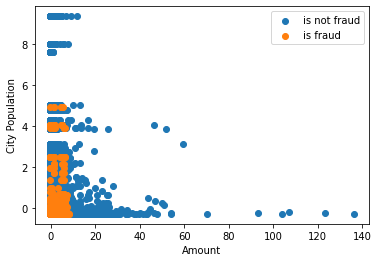

In [ ]:
#Plotting "Amount" and "City Population" for the two values of the target variable
plt.scatter(OG_data_temp[OG_data_temp["is_fraud"]==0]["amt"], OG_data_temp[OG_data_temp["is_fraud"]==0]["city_pop"])
plt.scatter(OG_data_temp[OG_data_temp["is_fraud"]==1]["amt"], OG_data_temp[OG_data_temp["is_fraud"]==1]["city_pop"])
plt.legend(["is not fraud","is fraud"])
plt.xlabel("Amount")
plt.ylabel("City Population")

After SMOTE

In [ ]:
#Creating a dataframe for SMOTE data
X_smote_df = pd.DataFrame(smote_X)
X_smote_df.columns = ["city_pop","amt","Weekend_binary","F","M"]
X_smote_df

,city_pop,amt,Weekend_binary,F,M
0,-0.291557,0.476167,1.243839,-1.102494,1.102494
1,0.396777,-0.298399,1.243839,-1.102494,1.102494
2,0.122324,-0.078744,1.243839,-1.102494,1.102494
3,-0.278683,0.016569,-0.803962,0.907034,-0.907034
4,0.152582,-0.083082,1.243839,-1.102494,1.102494
...,...,...,...,...,...
774991,-0.276472,4.997239,1.243839,-1.102494,1.102494
774992,-0.272622,4.514237,-0.803962,0.907034,-0.907034
774993,-0.284041,5.940996,1.243839,0.907034,-0.907034
774994,-0.273287,0.238385,1.243839,0.907034,-0.907034


In [ ]:
smote_y_df = pd.DataFrame(smote_y)
smote_y_df.columns = ["is_fraud"]
smote_y_df

,is_fraud
0,0
1,0
2,0
3,0
4,0
...,...
774991,1
774992,1
774993,1
774994,1


In [ ]:
smote_data_temp = pd.concat([X_smote_df, smote_y_df], axis = 1)

Text(0, 0.5, 'City Population')

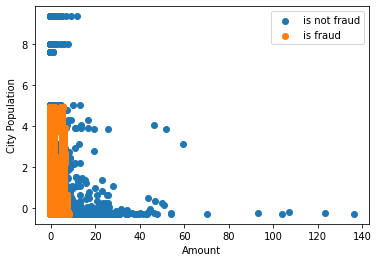

In [ ]:
plt.scatter(smote_data_temp[smote_data_temp["is_fraud"]==0]["amt"], smote_data_temp[smote_data_temp["is_fraud"]==0]["city_pop"])
plt.scatter(smote_data_temp[smote_data_temp["is_fraud"]==1]["amt"], smote_data_temp[smote_data_temp["is_fraud"]==1]["city_pop"])
plt.legend(["is not fraud","is fraud"])
plt.xlabel("Amount")
plt.ylabel("City Population")


As expected, this graph has more data points for "is fraud" which was the minority class and was oversampled using the Synthetic Minority Oversampling Technique.